Tensorflow 1.x 를 이용한 선형 회귀

In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("ggplot")
%matplotlib inline

In [3]:
tf.enable_eager_execution() #그래프 없이 연산을 즉시 실행하는 명령형 프로그래밍 환경 설정
tf.__version__

'1.15.2'

In [4]:
X = np.array([1, 2, 3], dtype = "float32") #독립 변수(입력값)
Y = np.array([2, 2.5, 3.5], dtype = "float32") #종속 변수(출력값)

In [5]:
W = tf.Variable([2], dtype = "float32")
b = tf.Variable([1], dtype = "float32")

In [6]:
learning_rate = 0.1

In [7]:
for i in range(300):
  with tf.GradientTape() as tape: #Gradient Decent를 실행, W와 b를 업데이트 할 객체 'tape' 생성
    hypothesis = W * X + b
    print("hypothesis: ", hypothesis)

    #tf.square(값): 값의 제곱을 리턴
    #tf.reduce_mean(): 평균 계산 
    cost = tf.reduce_mean(tf.square(hypothesis - Y)) #잔차 제곱의 평균을 'cost'에 대입
    print("cost: ", cost)
  
  W_gred, b_gred = tape.gradient(cost, [W, b]) #cost, W, b를 이용 'W_gred', 'b_gred' 계산해 리턴 
  print("W_gred: ", W_gred, " b_gred: ", b_gred)

  #A.assign_sub(값): A를 값만큼 감소시키는 함수
  W.assign_sub(W_gred * learning_rate)
  b.assign_sub(b_gred * learning_rate)
  print("=" * 100)

hypothesis:  tf.Tensor([3. 5. 7.], shape=(3,), dtype=float32)
cost:  tf.Tensor(6.5, shape=(), dtype=float32)
W_gred:  tf.Tensor([11.], shape=(1,), dtype=float32)  b_gred:  tf.Tensor([4.666667], shape=(1,), dtype=float32)
hypothesis:  tf.Tensor([1.4333333 2.3333333 3.233333 ], shape=(3,), dtype=float32)
cost:  tf.Tensor(0.14000006, shape=(), dtype=float32)
W_gred:  tf.Tensor([-1.1333339], shape=(1,), dtype=float32)  b_gred:  tf.Tensor([-0.6666669], shape=(1,), dtype=float32)
hypothesis:  tf.Tensor([1.6133333 2.6266665 3.6399999], shape=(3,), dtype=float32)
cost:  tf.Tensor(0.06171849, shape=(), dtype=float32)
W_gred:  tf.Tensor([0.19111069], shape=(1,), dtype=float32)  b_gred:  tf.Tensor([-0.08000016], shape=(1,), dtype=float32)
hypothesis:  tf.Tensor([1.6022222 2.5964446 3.5906668], shape=(3,), dtype=float32)
cost:  tf.Tensor(0.058583066, shape=(), dtype=float32)
W_gred:  tf.Tensor([0.04474115], shape=(1,), dtype=float32)  b_gred:  tf.Tensor([-0.14044428], shape=(1,), dtype=float32)
hy

In [8]:
print("i = {}, W = {}, b = {}, cost = {}".format(i, W.numpy(), b.numpy(), cost))

i = 299, W = [0.7501783], b = [1.1662613], cost = 0.01388890016824007


(0.0, 4.0)

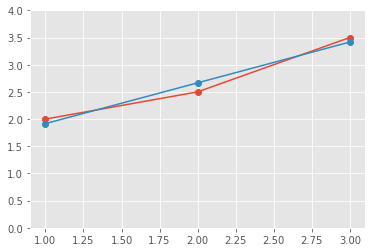

In [19]:
plt.plot(X, Y, marker = "o")
plt.plot(X, hypothesis.numpy(), marker = "o")
plt.ylim(0, 4)

Tensorflow 2.x를 이용한 선형 회귀

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [11]:
X = np.array([1, 2, 3], dtype = "float32") #독립 변수(입력값)
Y = np.array([2, 2.5, 3.5], dtype = "float32") #종속 변수(출력값)

In [12]:
model = Sequential() #입력값을 읽어 에측할 'Seqiential' 객체 생성, 'model'에 저장

#Dense: 선형 회귀를 수행할 객체
##Dense(출력 데이터의 칸의 수)
##출력 데이터 1, 칸의 수 1이기에 Dense(1)

#input_dim: 입력 데이터 칸의 수
##입력 데이터 X, 칸의 수 1이기에 input_dim = 1

#Dense(1, input_dim = 1): 선형 회귀를 수행할 객체 생성(출력 칸 수: 1, 입력 칸 수: 1)

model.add(Dense(1, input_dim = 1)) #Dense 모델을 에측할 수 있도록 model에 추가 

In [13]:
model.summary() #생성된 모델의 정보 출력

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [14]:
#GradientDecent를 이용해 W, b를 찾는 방법 설정
##loss = "mean_squared_error": 잔차 제곱합이 최소가 되는 W, b를 찾음 
##optimizer = Adam(lr = 0.1): learning rate = 0.1로 설정
model.compile(loss = "mean_squared_error", optimizer = Adam(lr = 0.1))

In [15]:
model.fit(X, Y, epochs = 1000) #1000번 반복해 W, b 계산

Train on 3 samples
Epoch 1/1000
3/3 [==============================] - 1s 411ms/sample - loss: 1.1157
Epoch 2/1000
3/3 [==============================] - 0s 2ms/sample - loss: 0.5911
Epoch 3/1000
3/3 [==============================] - 0s 2ms/sample - loss: 0.2660
Epoch 4/1000
3/3 [==============================] - 0s 991us/sample - loss: 0.1275
Epoch 5/1000
3/3 [==============================] - 0s 2ms/sample - loss: 0.1363
Epoch 6/1000
3/3 [==============================] - 0s 682us/sample - loss: 0.2218
Epoch 7/1000
3/3 [==============================] - 0s 1ms/sample - loss: 0.3071
Epoch 8/1000
3/3 [==============================] - 0s 922us/sample - loss: 0.3454
Epoch 9/1000
3/3 [==============================] - 0s 851us/sample - loss: 0.3291
Epoch 10/1000
3/3 [==============================] - 0s 751us/sample - loss: 0.2745
Epoch 11/1000
3/3 [==============================] - 0s 937us/sample - loss: 0.2052
Epoch 12/1000
3/3 [==============================] - 0s 677us/sample - los

In [16]:
model.layers[0].get_weights() #계산된 W, b 출력

[array([[0.75]], dtype=float32), array([1.1666666], dtype=float32)]

In [17]:
w = model.layers[0].get_weights()[0][0] #X에 곱해지는 수 w를 변수에 대입
b = model.layers[0].get_weights()[1][0] #X에 더해지는 수 b를 변수에 대입

In [18]:
pred = model.predict([10, 20]) #X가 각 10, 20일 때, 예측한 값을 pred에 대입